In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import Markdown, display
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

In [51]:
pd_textbook = pd.read_csv("/Users/joaobaptista/Documents/personal/mineracao-dados-massivos/evaluation/evaluation/pd_textbook_test_embedding_1000.csv")

In [61]:
pd_textbook.columns

Index(['Unnamed: 0', 'sentence', 'embedding_sentence', 'token_sentence',
       'metadata', 'rewrited_sentence', 'rewrited_sentence_embedding',
       'rewrited_sentence_token_count', 'rewrited_sentence_embedding_np'],
      dtype='object')

In [55]:
pd_textbook['rewrited_sentence_embedding_np'] = pd_textbook['rewrited_sentence_embedding'].apply(eval).apply(np.array)

In [85]:
pd_textbook['embedding_sentence_np'] = pd_textbook['embedding_sentence'].apply(eval).apply(np.array)

In [86]:
vector_embedding_reference = pd_textbook["rewrited_sentence_embedding_np"][0]

In [87]:
pd_textbook_10 = pd_textbook.head(10)

In [95]:
sentence = pd_textbook_10["sentence"].values

In [98]:
query_id = pd_textbook_10["Unnamed: 0"].values

In [99]:
cos_sim_array = cosine_similarity(list(pd_textbook_10["embedding_sentence_np"].values))

# display as DataFrame
df = pd.DataFrame(cos_sim_array, index=query_id, columns=query_id)

In [100]:
df

,0,2,3,4,5,7,8,9,10,12
0,1.000000,0.879234,0.868362,0.869932,0.881523,0.869066,0.850449,0.840540,0.830564,0.889685
2,0.879234,1.000000,0.899387,0.863709,0.922916,0.814829,0.917926,0.784409,0.841273,0.912924
3,0.868362,0.899387,1.000000,0.935112,0.878246,0.856055,0.886851,0.811597,0.898410,0.908055
4,0.869932,0.863709,0.935112,1.000000,0.863917,0.880448,0.849669,0.816154,0.936084,0.907186
5,0.881523,0.922916,0.878246,0.863917,1.000000,0.810038,0.872500,0.775200,0.841152,0.946930
7,0.869066,0.814829,0.856055,0.880448,0.810038,1.000000,0.825789,0.900232,0.863989,0.843834
8,0.850449,0.917926,0.886851,0.849669,0.872500,0.825789,1.000000,0.779065,0.820234,0.862838
9,0.840540,0.784409,0.811597,0.816154,0.775200,0.900232,0.779065,1.000000,0.813916,0.780938
10,0.830564,0.841273,0.898410,0.936084,0.841152,0.863989,0.820234,0.813916,1.000000,0.872341
12,0.889685,0.912924,0.908055,0.907186,0.946930,0.843834,0.862838,0.780938,0.872341,1.000000


[Text(0.5, 1, '0'),
 Text(1.5, 1, '2'),
 Text(2.5, 1, '3'),
 Text(3.5, 1, '4'),
 Text(4.5, 1, '5'),
 Text(5.5, 1, '7'),
 Text(6.5, 1, '8'),
 Text(7.5, 1, '9'),
 Text(8.5, 1, '10'),
 Text(9.5, 1, '12')]

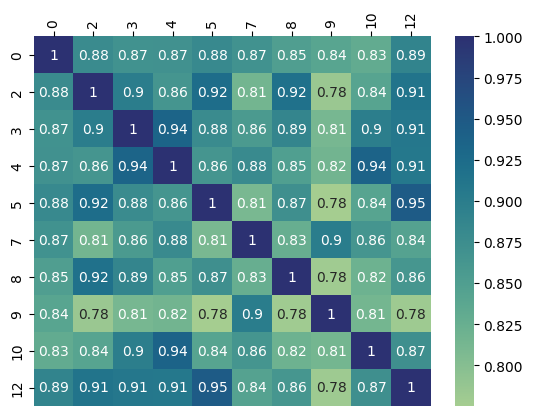

In [102]:
ax = sns.heatmap(df, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(query_id, rotation=90)

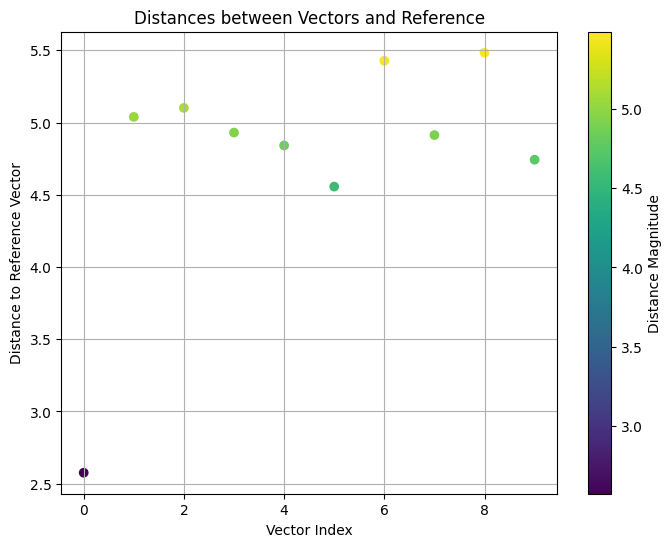

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: 10 vectors (each with 3 dimensions) and 1 reference vector
data = list(pd_textbook_10["embedding_sentence_np"].values)  # 10 vectors with 3 dimensions
reference_vector = vector_embedding_reference  # Reference vector with 3 dimensions

# Calculate distances using Euclidean distance
distances = np.linalg.norm(data - reference_vector, axis=1)

# Visualization: Scatter plot with distances colored by magnitude
plt.figure(figsize=(8, 6))
plt.scatter(range(len(distances)), distances, c=distances, cmap='viridis')  # Color by distance
plt.xlabel('Vector Index')
plt.ylabel('Distance to Reference Vector')
plt.title('Distances between Vectors and Reference')
plt.colorbar(label='Distance Magnitude')
plt.grid(True)
plt.show()

# Note: Confusion matrix is not suitable here
# A confusion matrix is typically used for classification tasks with discrete labels.
# In this case, we're calculating distances, not classifying vectors.


In [107]:
distances

array([2.57617199, 5.03932413, 5.101682  , 4.93098181, 4.84202319,
       4.5569478 , 5.4285675 , 4.91357796, 5.48368644, 4.74303   ])

In [115]:
eud_dist = euclidean_distances(list(pd_textbook_10["embedding_sentence_np"].values), [vector_embedding_reference])

cos_sim_array = cosine_similarity(list(pd_textbook_10["embedding_sentence_np"].values), [vector_embedding_reference])


In [117]:
cos_sim_array

array([[0.94992452],
       [0.8150429 ],
       [0.8087211 ],
       [0.81795517],
       [0.83072551],
       [0.84062311],
       [0.78340369],
       [0.81333844],
       [0.78068093],
       [0.83845735]])

[Text(0.5, 1, '0'),
 Text(1.5, 1, '2'),
 Text(2.5, 1, '3'),
 Text(3.5, 1, '4'),
 Text(4.5, 1, '5'),
 Text(5.5, 1, '7'),
 Text(6.5, 1, '8'),
 Text(7.5, 1, '9'),
 Text(8.5, 1, '10'),
 Text(9.5, 1, '12')]

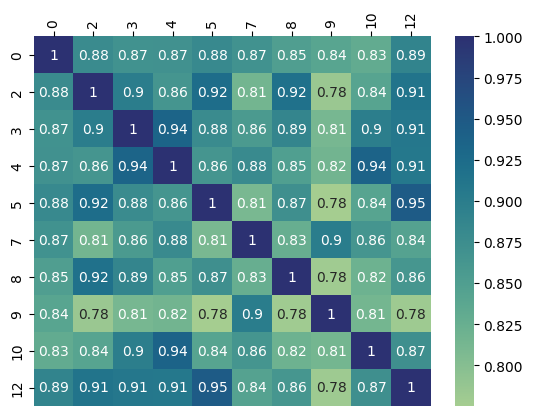

In [110]:
ax = sns.heatmap(df, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(query_id, rotation=90)